In [8]:
%pip install seaborn

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [10]:
df = pd.read_csv("diabetes.csv")

In [11]:
# Display basic info
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [12]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)
#stratify-y for keeping same 0/1 ration in train & test to avoid biasness

In [15]:
# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

In [17]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
error_rate = 1 - acc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [18]:
# Print results
print("\nConfusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Confusion Matrix:
 [[125  25]
 [ 41  40]]
Accuracy: 0.7143
Error Rate: 0.2857
Precision: 0.6154
Recall: 0.4938


Specificity: 0.8333


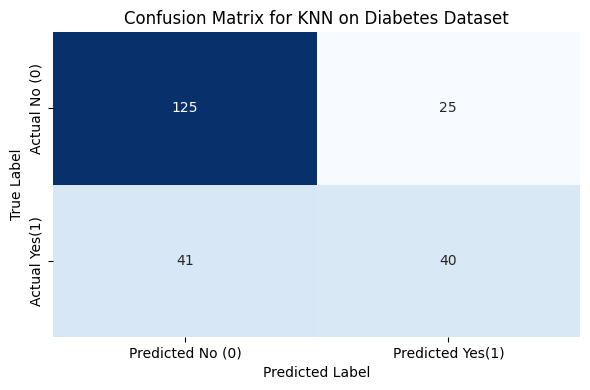

In [20]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No (0)', 'Predicted Yes(1)'],
            yticklabels=['Actual No (0)', 'Actual Yes(1)'])
plt.title('Confusion Matrix for KNN on Diabetes Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [21]:
'''Accuracy- How many predictions were correct overall
Error Rate-Fraction of incorrect predictions
Precision-How many predicted positives were actually positive
Recall (Sensitivity)-How many actual positives were detected
F1 Score-Balance between Precision and Recall
Specificity- How many actual negatives were correctly identified'''

'Accuracy- How many predictions were correct overall\nError Rate-Fraction of incorrect predictions\nPrecision-How many predicted positives were actually positive\nRecall (Sensitivity)-How many actual positives were detected\nF1 Score-Balance between Precision and Recall\nSpecificity- How many actual negatives were correctly identified'